<a href="https://www.kaggle.com/baraaalialherwi/exploratory-data-analysis-of-titanic-survival?scriptVersionId=89621026" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# reading train test and sub dataset
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")
sub = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [3]:
# First five rows in train dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# First five rows in test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# First five rows in sub dataset
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [6]:
# All information for train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# All information for test dataset by columns
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# Missing data in train dataset by columns
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
# Missing data in test dataset
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

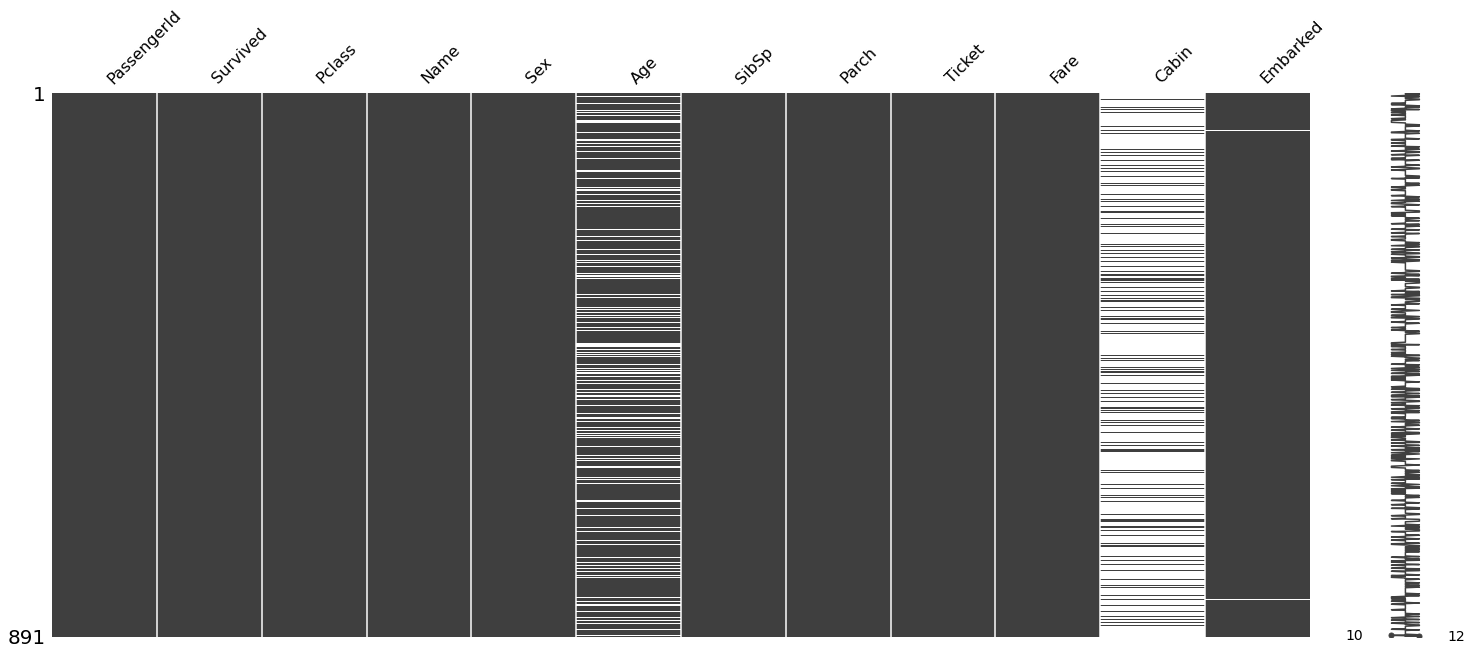

In [10]:
# Missing data in train dataset
msno.matrix(train)

<AxesSubplot:>

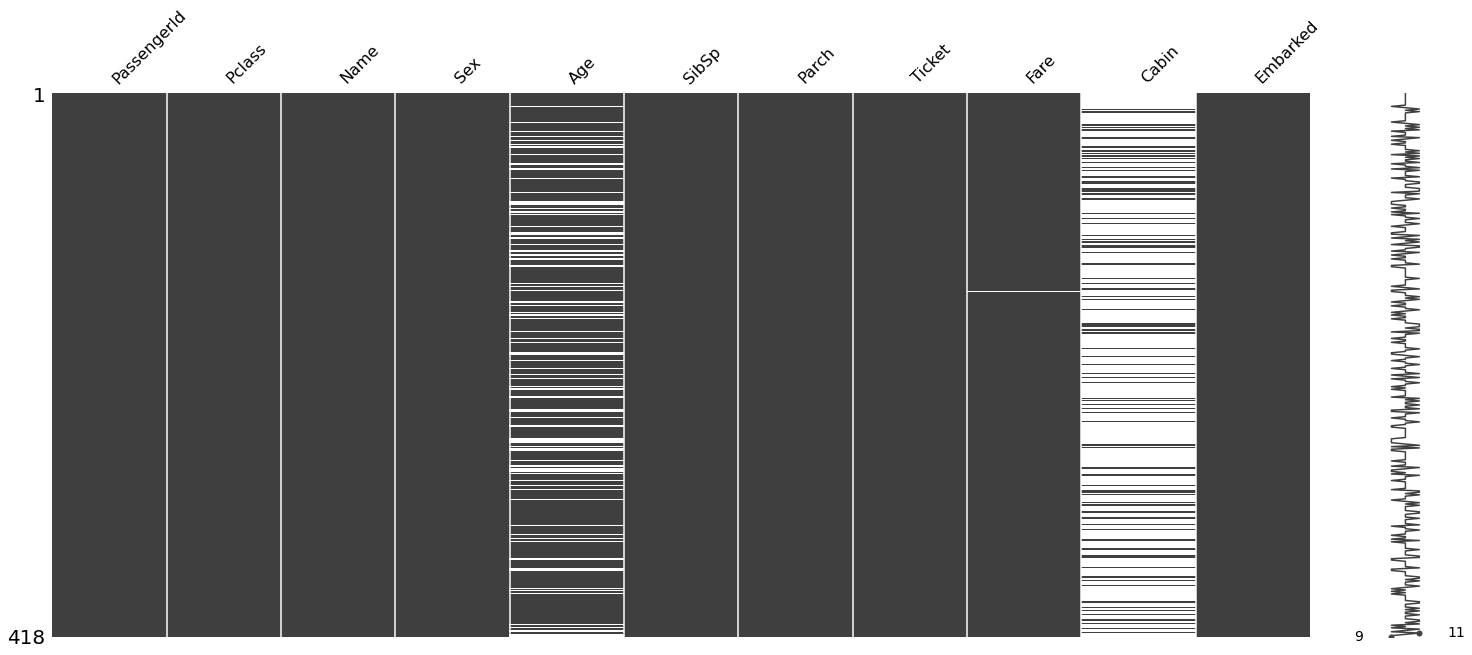

In [11]:
# Missing data in test dataset
msno.matrix(test)

In [12]:
# Fill missing data in Age column by Age mean
train['Age'].fillna(train['Age'].mean(),inplace = True)

In [13]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
# Fill missing data in Embarked column by top value in it
train['Embarked'].fillna('S',inplace = True)

In [15]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
# summary statistics for train dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# summary statistics for test dataset
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [18]:
# Value counts of the sex column
train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [19]:
# Mean of survival by sex
train[['Sex','Survived']].groupby(['Sex'] , as_index = False).mean().sort_values(by='Survived',ascending= False )

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

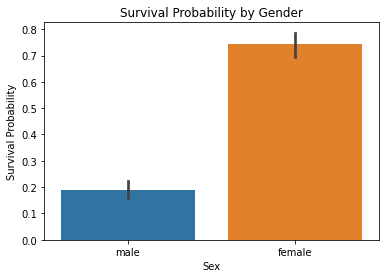

In [20]:
sns.barplot(x = 'Sex' , y = 'Survived' ,data = train )
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

In [21]:
# Value counts of the Pclass column
train['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
#  Mean of survival by passenger class
train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by='Survived' , ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by passenger class')

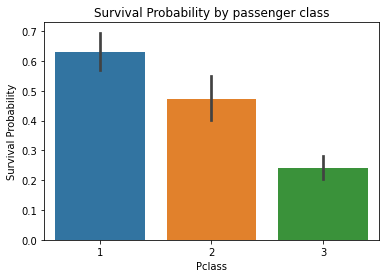

In [23]:
sns.barplot(x = 'Pclass' , y = 'Survived' ,data = train )
plt.ylabel('Survival Probability')
plt.title('Survival Probability by passenger class')

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

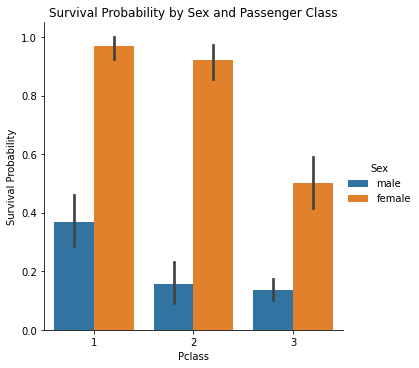

In [24]:
# Survival by gender and passenger class
sns.catplot(x='Pclass' ,y='Survived',hue='Sex' ,data= train,kind ='bar') 
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [25]:
# Value counts of the Embarked column
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
#  Mean of survival by Embarked class
train[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean().sort_values(by='Survived' , ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


Text(0.5, 1.0, 'Survival Probability by Embarked')

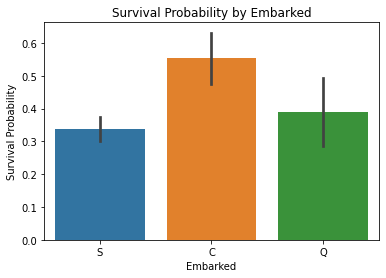

In [27]:
sns.barplot(x = 'Embarked' , y = 'Survived' ,data = train )
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Embarked')

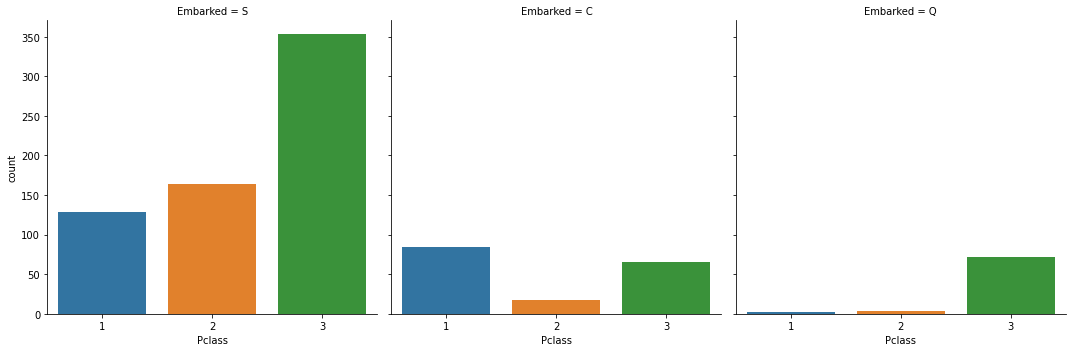

In [28]:
sns.catplot(x='Pclass',col= 'Embarked' ,data= train,kind ='count') 

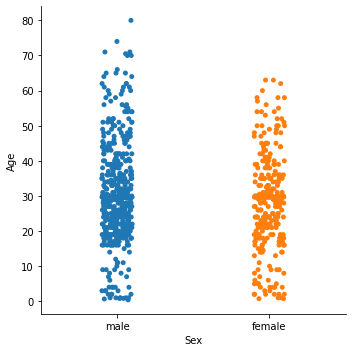

In [29]:
#  compare between ‘Sex’ and ‘Age’ columns .
sns.catplot(x='Sex',y='Age',data= train)

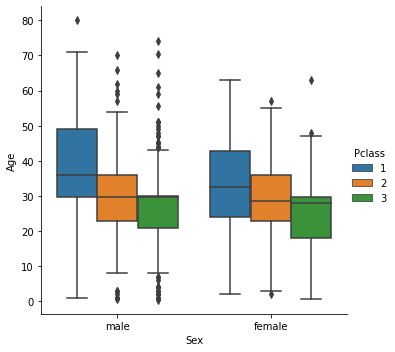

In [30]:
#  compare between ‘Sex’ and ‘Age’ columns by Pclass.
sns.catplot(x='Sex',y='Age',data= train ,hue='Pclass',kind ="box" )

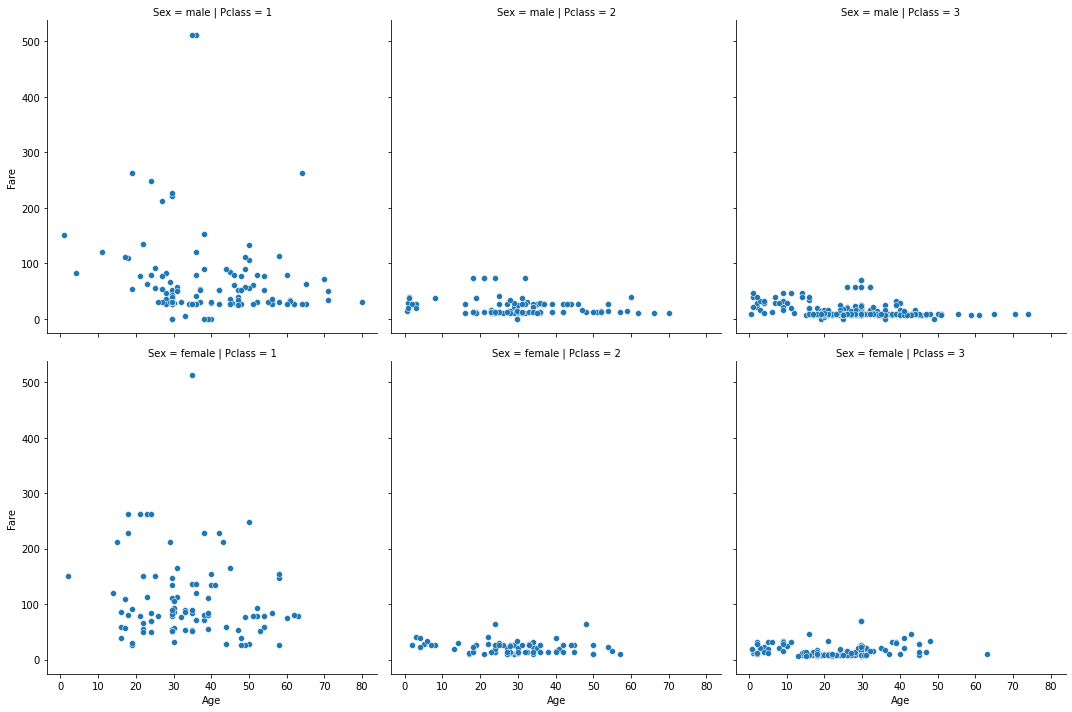

In [31]:
sns.relplot(x= 'Age' ,y= 'Fare' ,data=train ,row= 'Sex' ,col='Pclass')

<AxesSubplot:ylabel='Survived'>

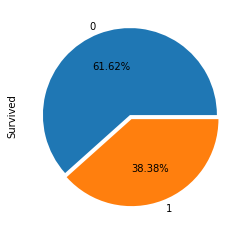

In [32]:
explode = [0, 0.05]
train['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

<AxesSubplot:ylabel='Sex'>

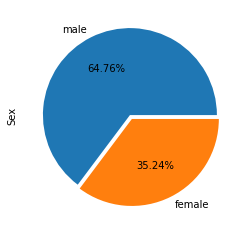

In [33]:
train['Sex'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)